# Measure of Central Tendency

In [ ]:
import statistics

# Sample data
data = [2, 3, 3, 5, 7, 10, 10, 10, 15]

# Calculate Mean
mean = statistics.mean(data)
print(f"Mean: {mean}")

# Calculate Median
median = statistics.median(data)
print(f"Median: {median}")

# Calculate Mode
mode = statistics.mode(data)
print(f"Mode: {mode}")

Mean: 7.222222222222222
Median: 7
Mode: 10


In [ ]:
import numpy as np
from scipy import stats

# Sample data
data = [2, 3, 3, 5, 7, 10, 10, 10, 15]

# Calculate Mean
mean = np.mean(data)
print(f"Mean: {mean}")

# Calculate Median
median = np.median(data)
print(f"Median: {median}")

# Calculate Mode
mode_result = stats.mode(data, keepdims=True)
print(f"Mode: {mode_result.mode[0]}, Count: {mode_result.count[0]}")


Mean: 7.222222222222222
Median: 7.0
Mode: 10, Count: 3


In [ ]:
import pandas as pd

# Sample data
data = [2, 3, 3, 5, 7, 10, 10, 10, 15]

# Create a Pandas Series
series = pd.Series(data)

# Calculate Mean
mean = series.mean()
print(f"Mean: {mean}")

# Calculate Median
median = series.median()
print(f"Median: {median}")

# Calculate Mode
mode = series.mode()
print(f"Mode: {mode.tolist()}")

Mean: 7.222222222222222
Median: 7.0
Mode: [10]


# Measure of variability

In [ ]:
import numpy as np
from scipy.stats import iqr

# Sample data
data = [2, 3, 3, 5, 7, 10, 10, 10, 15]

# Calculate Range
data_range = np.max(data) - np.min(data)
print(f"Range: {data_range}")

# Calculate Variance
variance = np.var(data, ddof=1)  # Use ddof=1 for sample variance
print(f"Variance: {variance}")

# Calculate Standard Deviation
std_dev = np.std(data, ddof=1)  # Use ddof=1 for sample standard deviation
print(f"Standard Deviation: {std_dev}")

# Calculate Interquartile Range (IQR)
iqr_value = iqr(data)
print(f"Interquartile Range (IQR): {iqr_value}")

Range: 13
Variance: 18.944444444444443
Standard Deviation: 4.352521619066865
Interquartile Range (IQR): 7.0


In [ ]:
import pandas as pd

# Sample data
data = [2, 3, 3, 5, 7, 10, 10, 10, 15]

# Create a Pandas Series
series = pd.Series(data)

# Calculate Range
data_range = series.max() - series.min()
print(f"Range: {data_range}")

# Calculate Variance
variance = series.var()  # By default, calculates sample variance
print(f"Variance: {variance}")

# Calculate Standard Deviation
std_dev = series.std()  # By default, calculates sample standard deviation
print(f"Standard Deviation: {std_dev}")

# Calculate Interquartile Range (IQR)
iqr_value = series.quantile(0.75) - series.quantile(0.25)
print(f"Interquartile Range (IQR): {iqr_value}")

Range: 13
Variance: 18.944444444444443
Standard Deviation: 4.352521619066865
Interquartile Range (IQR): 7.0


# Poisson Distribution

Let's say the number of buses arriving at a bus stop in a 30-minute period is 1. The Poisson distribution can be used to model the probability of a different number of buses, X, arriving at the bus stop in the next 30-minute interval, where X can take values 0, 1, 2, 3, 4.
Random variable: the number of buses
The average number of buses arriving at the stop every 30 minutes is 1

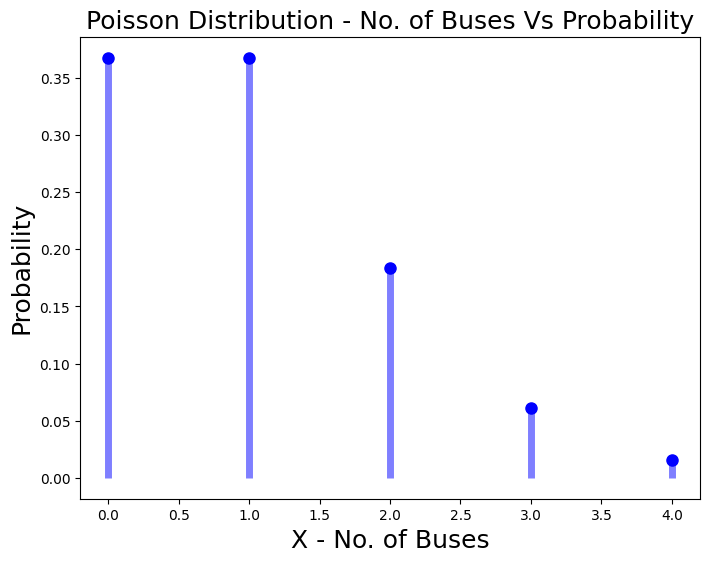

In [ ]:
from scipy.stats import poisson
import matplotlib.pyplot as plt

X = [0, 1, 2, 3, 4]
lmbda = 1

# Probability values
poisson_pd = poisson.pmf(X, lmbda)

# Plot the probability distribution
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(X, poisson_pd, 'bo', ms=8, label='poisson pmf')
plt.ylabel("Probability", fontsize="18")
plt.xlabel("X - No. of Buses", fontsize="18")
plt.title("Poisson Distribution - No. of Buses Vs Probability", fontsize="18")
ax.vlines(X, 0, poisson_pd, colors='b', lw=5, alpha=0.5)

# Normal Distribution

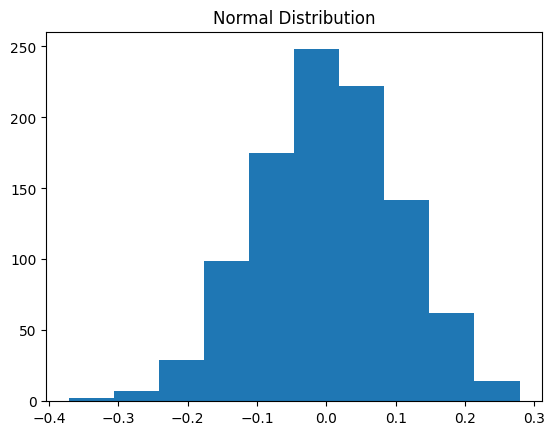

In [ ]:

mu, sigma = 0, 0.1
dist_normal = np.random.normal(mu, sigma, 1000)

plt.hist(dist_normal, bins=10)
plt.title("Normal Distribution")
plt.show()

# Central Limit Theorem

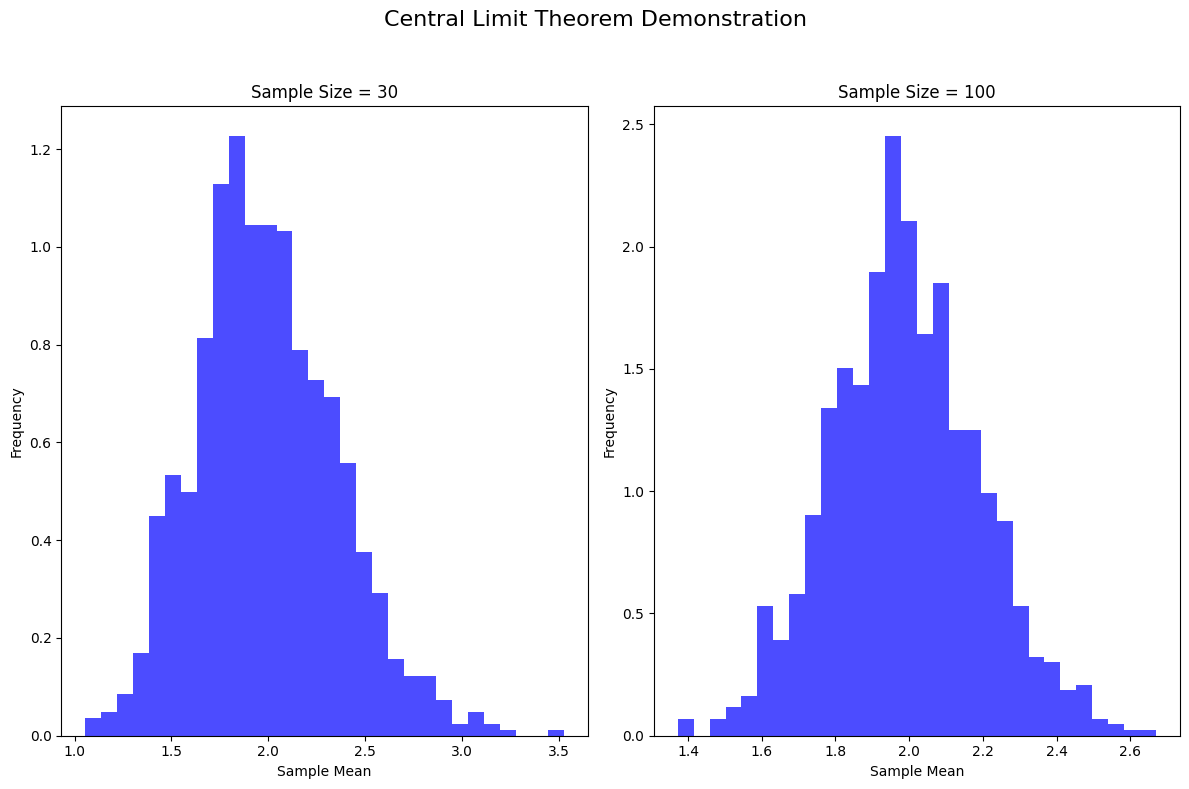

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Population: Exponential distribution (not normally distributed)
population = np.random.exponential(scale=2, size=100000)

# Function to calculate sample means
def sample_means(population, sample_size, num_samples):
    means = []
    for _ in range(num_samples):
        sample = np.random.choice(population, size=sample_size, replace=False)
        means.append(np.mean(sample))
    return means

# Parameters
sample_sizes = [30, 100]  # Different sample sizes
num_samples = 1000           # Number of samples per size

# Plotting
plt.figure(figsize=(12, 8))

for i, size in enumerate(sample_sizes):
    means = sample_means(population, sample_size=size, num_samples=num_samples)
    plt.subplot(1, len(sample_sizes), i+1)
    plt.hist(means, bins=30, density=True, alpha=0.7, color='blue')
    plt.title(f"Sample Size = {size}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")

plt.suptitle("Central Limit Theorem Demonstration", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Confidence Interval (CI), Margin of Error (MOE), Z-Score, T-Score

Key Observations:<br>
The Z-Score approach assumes the population standard deviation is known, leading to a wider margin of error.<br>
The T-Score approach accounts for the sample standard deviation and smaller sample size, resulting in a tighter confidence interval.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm, t


# Create a Pandas Series for the data
data = pd.Series([50, 52, 53, 49, 48, 47, 51, 50, 52, 49])

# Parameters
confidence_level = 0.95  # 95% confidence level
sample_size = len(data)
sample_mean = data.mean()
sample_std_dev = data.std(ddof=1)  # Use ddof=1 for sample standard deviation
population_std_dev = 5  # Assume a known population standard deviation (for Z-Score)

# Z-Score based calculations (when population standard deviation is known)
z_score = norm.ppf(1 - (1 - confidence_level) / 2)
margin_of_error_z = z_score * (population_std_dev / np.sqrt(sample_size))
ci_lower_z = sample_mean - margin_of_error_z
ci_upper_z = sample_mean + margin_of_error_z

# T-Score based calculations (when population standard deviation is unknown)
t_score = t.ppf(1 - (1 - confidence_level) / 2, df=sample_size - 1)
margin_of_error_t = t_score * (sample_std_dev / np.sqrt(sample_size))
ci_lower_t = sample_mean - margin_of_error_t
ci_upper_t = sample_mean + margin_of_error_t


# Print results
print(f"Sample Data: {data.tolist()}")
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std_dev:.2f}")
print(f"Sample Size: {sample_size}")

print("\nUsing Z-Score (Population Std Dev Known):")
print(f"Z-Score: {z_score:.2f}")
print(f"Margin of Error: {margin_of_error_z:.2f}")
print(f"Confidence Interval: ({ci_lower_z:.2f}, {ci_upper_z:.2f})")

print("\nUsing T-Score (Population Std Dev Unknown):")
print(f"T-Score: {t_score:.2f}")
print(f"Margin of Error: {margin_of_error_t:.2f}")
print(f"Confidence Interval: ({ci_lower_t:.2f}, {ci_upper_t:.2f})")

Sample Data: [50, 52, 53, 49, 48, 47, 51, 50, 52, 49]
Sample Mean: 50.10
Sample Standard Deviation: 1.91
Sample Size: 10

Using Z-Score (Population Std Dev Known):
Z-Score: 1.96
Margin of Error: 3.10
Confidence Interval: (47.00, 53.20)

Using T-Score (Population Std Dev Unknown):
T-Score: 2.26
Margin of Error: 1.37
Confidence Interval: (48.73, 51.47)


# One-Sample t-Test

This test is used to compare the mean of a sample to a known value (e.g., population mean).

The null hypothesis 𝐻0 is that the sample mean equals the population mean.

In [ ]:
import pandas as pd
from scipy import stats

# Sample data
data = pd.Series([50, 52, 53, 49, 48, 47, 51, 50, 52, 49])

# Known population mean
population_mean = 50

# Perform One-Sample t-Test
t_stat, p_value = stats.ttest_1samp(data, population_mean)

print(f"One-Sample t-Test:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

One-Sample t-Test:
T-Statistic: 0.17
P-Value: 0.8723


Given the high p-value (0.8723), much greater than the common alpha level of 0.05, we do not have sufficient evidence to reject the null hypothesis. It suggests that the sample mean is not significantly different from the population mean.

# Two-Sample t-Test:
This test is used to compare the means of two independent samples. The null hypothesis 𝐻0 is that the means of the two groups are equal.

In [ ]:
# Sample data for two groups
group1 = pd.Series([50, 52, 53, 49, 48])
group2 = pd.Series([47, 51, 50, 52, 49])

# Perform Two-Sample t-Test
t_stat, p_value = stats.ttest_ind(group1, group2)

print(f"\nTwo-Sample t-Test:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")


Two-Sample t-Test:
T-Statistic: 0.47
P-Value: 0.6479


Given the p-value (0.6479), slightly higher than the conventional alpha level of 0.05, we do not have enough evidence to reject the null hypothesis at a 5% significance level. It suggests that while there is a tendency towards a difference between the two group means, this difference is not statistically significant at the 5% level.

# Chi-Square Test:
The Chi-Square test is used for categorical data to test if there is a significant association between two categorical variables. The null hypothesis 𝐻0 is that the variables are independent (no association). The larger the chi-square statistic, the less likely the variables are independent

In [ ]:
# Sample data: observed frequencies (contingency table)
observed = pd.DataFrame({
    'A': [25, 15],
    'B': [30, 20]
})

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"\nChi-Square Test:")
print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")


Chi-Square Test:
Chi-Square Statistic: 0.00
P-Value: 0.9807
Degrees of Freedom: 1
Expected Frequencies:
[[24.44444444 30.55555556]
 [15.55555556 19.44444444]]


Degrees of Freedom are calculated based on the number of categories in the data. <br><br>For a 2×2 contingency table, the degrees of freedom are typically (rows – 1) * (columns – 1) = 1. <br><br>And Expected Frequencies are the frequencies that would be expected if there were no association between the variables. <br>In our case, the expected frequencies are 24.44 and 15.55 for both categories. It is what we would expect to see if the null hypothesis were true.<br><br>

In this case, the p-value (0.9807) is greater than the common alpha level of 0.05, so we do not have sufficient evidence to reject the null hypothesis. <br>It suggests that the data do not provide strong evidence of a significant association between the two categorical variables.

# ANOVA (Analysis of Variance):
ANOVA tests if there are any statistically significant differences between the means of three or more independent groups.

In [ ]:
# Sample data for three groups
group1 = pd.Series([50, 52, 53, 49, 48])
group2 = pd.Series([60, 62, 63, 59, 58])
group3 = pd.Series([40, 42, 43, 39, 38])

# Perform ANOVA
f_stat, p_value = stats.f_oneway(group1, group2, group3)

print(f"\nANOVA Test:")
print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.4f}")


ANOVA Test:
F-Statistic: 116.28
P-Value: 0.0000


The F-statistic is a ratio of the variance between the group means to the variance within the groups. A higher F-statistic typically indicates a greater probability that there are significant differences between the means of the groups.<br>

Given the low p-value (far below the conventional alpha level of 0.00), there is strong evidence to reject the null hypothesis. It indicates that there are significant differences among the group means.